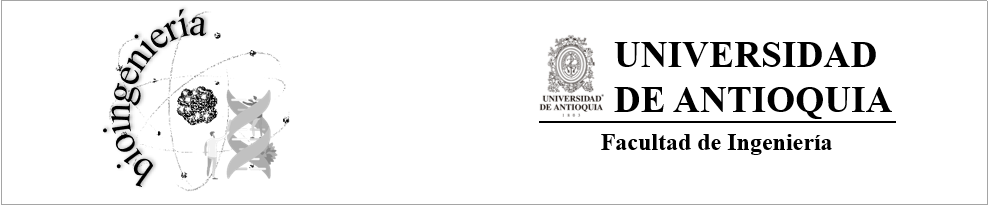

# Regresión Logística

A partir de un conjunto de datos de entrada (características), para obtener una salida discreta (y no continua) se utiliza $Regresión\ Logística$ (y no Regresión Lineal). La $Regresión\ Logística$ es un Algoritmo <u>Supervisado</u> y se utiliza para <u>clasificación</u>.


<b>RECORDEMOS</b>:
Los problemas de clasificación con dos posibles estados “SI/NO”: $binario$ o un número finito de “etiquetas” o “clases”: $múltiple$. Algunos Ejemplos de Regresión Logística son:


1. Clasificar si el correo que llega es Spam o No es Spam
2. Dada un imagen médica, clasificar si hay presencia cáncer o no.
3. El texto de una noticia es de: Entretenimiento, Deportes, Política o Ciencia y tecnología.
4. A partir del historial bancario de una persona aprobar un crédito o no.

<div align="center">
    
# $P(y\ =\ categorical | x ; w)$

Es la probabilidad de obtener una salida $Y$ categórica teniendo como entrada las $x$ y $w$
<br><br>

En términos generales, si se generaliza el problema multidimensional, se tiene la forma:

# $y\ =\ W^T·X$
<br><br>
# $W^T\ =\ [w_0\ \ w_1\ \ w_2 ... ]\ ·\ X\ =\ \begin{bmatrix} 1\\ x_1\\ x_2\\ .\\ .\\ .\end{bmatrix}$
<br>

# $y\ =\ w_0\ +\ w_1·x_1\ +\ w_2·x_2\ +\ ...\ +\ w_p·x_p$
    


### Debido a que es un probabilidad, entonces se necesita que la salida esté entre 0 y 1, para esto se utiliza la $Función\ sigmoidal$

<div align="center">

# $\sigma(x) = \frac{1} {(1 + e^{-x})}$

entonces;

# $\sigma(W^T·X) = \frac{1} {(1 + e^{-W^T·X})}$
    


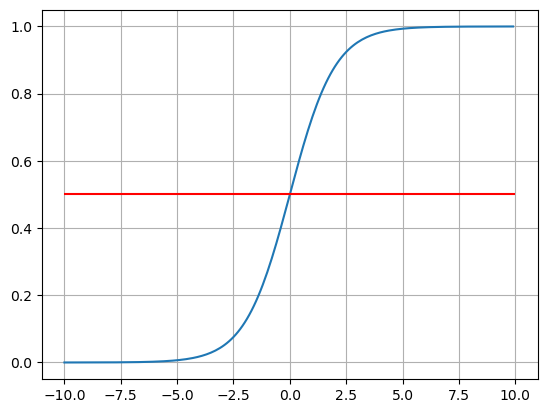

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

x = np.arange(-10,10,.1)
y = sigmoid(x)

plt.plot(x,y)
plt.hlines(y=.5 , xmin=-10 , xmax=10 , color='red')
plt.grid()
plt.show()


<div align="center">
    
# $P(y\ =\ 1 | X ; W)\ =\ \sigma(W^T·X)$
    
## y
    
# $P(y\ =\ 0 | X ; W)\ =\ 1\ -\ \sigma(W^T·X)$

\[
P(y = k \mid X; W) =
\begin{cases}
1 & \text{si } \sigma(W^T X) \geq 0.5 \\
0 & \text{si } \sigma(W^T X) < 0.5 \\
\end{cases}
\]

donde $\sigma(W^T X)$ es la función sigmoide.

# Ejercicio práctico usando Regresión Logística

Clasificar si el usuario que visita un sitio web usa como sistema operativo Windows, macOS o Linux.

La información de entrada son 4 características tomadas de una web que utiliza Google Analytics y son:

1. <b>time</b>: Duración de la visita en Segundos
2. <b>pages</b>: Cantidad de Páginas Vistas durante la Sesión
3. <b>actions</b>: Cantidad de Acciones del usuario (clic, scroll, uso de checkbox, sliders, etc)
4. <b>values</b>: Suma del Valor de las acciones (cada acción lleva asociada una valoración de importancia)

Como la salida es discreta, asignaremos los siguientes valores a las etiquetas:

0 – Windows<br>
1 – macOS<br>
2 – Linux<br>

Tamaño del archivo: 170 registros

### 1. Importación de las librerías a usar

In [2]:
#Librerías para la carga , visualización y operación de los datos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score , KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### 2. Carga del Dataset

In [3]:
!wget https://raw.githubusercontent.com/angelower/infomed20251/main/data/usuarios_win_mac_lin.csv

df = pd.read_csv("usuarios_win_mac_lin.csv")
df.head()

--2025-05-06 12:29:32--  https://raw.githubusercontent.com/angelower/infomed20251/main/data/usuarios_win_mac_lin.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2332 (2.3K) [text/plain]
Saving to: ‘usuarios_win_mac_lin.csv’

usuarios_win_mac_li 100%[===================>]   2.28K  --.-KB/s    in 0s      

2025-05-06 12:29:32 (7.94 MB/s) - ‘usuarios_win_mac_lin.csv’ saved [2332/2332]



,time,pages,actions,values,op
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


### 3. Análisis descriptivo

In [ ]:
df.describe()

In [ ]:
print('*** MUESTRAS POR CLASE ***')
print(df.groupby('op').size())

In [ ]:
print('*** ANÁLISIS DE FRECUENCIA DE LAS VARIABLES INDEPENDIENTES ***')
df.drop(['op'],axis=1).hist(figsize=(16,5))
plt.show()

### 4. Creación del modelo de Regresión Logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### Preparación del dataset

In [ ]:
df.head()

In [ ]:
X = np.array(df.drop(['op'],axis=1))
y = np.array(df['op'])
print(f'Tamaño del conjunto de variables independientes: {X.shape}')
print(f'Tamaño del conjunto de variables dependientes: {y.shape}')

#### Creación de la instancia del modelo

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(X,y)

In [ ]:
X

IMPORTANTE: para un dataset pequeño, la documentación recomienda que de use el parámetro $solver="liblinear"$

### 5. Evaluación de predicción del modelo

In [ ]:
predictions = model.predict(X)
print(predictions[0:50])

In [ ]:
model.score(X,y)

In [ ]:
y[0:50]

# Validación del modelo

### 1. Separación de las muestras en _entrenamiento_ $train$ y _prueba_ $test$

In [ ]:
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=test_size
                                                    , random_state=seed)

### 2. Validación cruzada

In [ ]:
kfold = KFold(n_splits=5)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
print(f"Logistic Regression: {cv_results.mean()} ({cv_results.std()})")

In [ ]:
cv_results

### 3. Se hace la predicción con el modelo entrenado

In [ ]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
# Predicción
y_pred

In [ ]:
# Etiqueta real
y_test

### 4. Gráfica de la matriz de confusión

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred , target_names=['Win' , 'Mac' , 'Linux'] ))

<b><u>precision</u></b>: capacidad del clasificador de <b>no</b> etiquetar como positiva una muestra que es negativa.<br>
<b><u>recall</u></b>: capacidad del clasificador de encontrar todas las muestras positivas.<br>
<b><u>f1-score</u></b>: combinación de las métricas precisión y recall, donde 1 es el mejor resultado y 0 es el peor.

### 5. Otra forma de ver la matriz de confusión

In [ ]:
import seaborn as sns

labels = ['Win' , 'Mac' , 'Linux']
cm = confusion_matrix(y_test, y_pred )
fig , ax = plt.subplots(figsize=(8,4))
sns.heatmap(cm ,cmap='Blues',annot=True , xticklabels=labels, yticklabels=labels)
plt.xlabel('Valores de verdad')
plt.ylabel('Predicciones')
plt.show()

### 6. Hagamos la predicción de muestras nuevas.

In [ ]:
X_new = pd.DataFrame([[10, 3, 5, 9]])
model.predict(X_new)

In [ ]:
model.predict_proba(X_new)

In [ ]:
X_new2 = pd.DataFrame([[15, 5, 7, 19]])
model.predict(X_new2)

In [ ]:
model.predict_proba(X_new2)

In [ ]:
X_new3 = np.array([15, 10, 1, 19]).reshape(1,-1)

model.predict(X_new3)

In [ ]:
model.predict_proba(X_new3)

# Detallemos el entrenamiento con el $KFold$

In [ ]:
from sklearn.model_selection import KFold , cross_val_score

In [ ]:
kfold = KFold(n_splits=5)

for train, test in kfold.split(X, y):
    print(f'train -  {np.bincount(y[train])}   |   test -  {np.bincount(y[test])}')
    cv_results = cross_val_score(model, X[train], y[train], scoring='accuracy' )
    print(f"Logistic Regression: {cv_results.mean()} ({cv_results.std()})\n")


# Entrenamiento con el $KFold$ estratificado

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(X, y):
    print(f'train -  {np.bincount(y[train])}   |   test -  {np.bincount(y[test])}')
    cv_results = cross_val_score(model, X[train], y[train], scoring='accuracy' )
    print(f"Logistic Regression: {cv_results.mean()} ({cv_results.std()})\n")

In [ ]:
# Predicción de muestras nuevas
X_new = pd.DataFrame([[10, 3, 5, 9]])
model.predict(X_new)

In [ ]:
# Score de predicción de las muestras nuevas (test)
y_pred = model.predict(X[test])
print(accuracy_score(y[test], y_pred))

## Matriz de confusión

In [ ]:
labels = ['Win' , 'Mac' , 'Linux']
cm = confusion_matrix( y_pred , y[test] )
fig , ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm ,cmap='Blues',annot=True , xticklabels=labels, yticklabels=labels)
plt.xlabel('Valores de verdad')
plt.ylabel('Predicciones')
plt.show()